# SPRINT 5. M5 T01: HIPOTESIS TESTING

Descarreguem les següents llibreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Instal.lem la llibreria scikit-learn

In [2]:
! pip install -U scikit-learn

     ---------------------------------------- 7.6/7.6 MB 1.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


## Exercici 1

A partir del dataset dades oficials de la UEFA, selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [3]:
# Importem l'arxiu i elmostrem:

df = pd.read_csv('./dataset/Lligues_europees_UEFA.csv', delimiter=";", decimal=".", encoding ='unicode_escape')
df.sample(3)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
37,38,Athletic Club,ESP,8,37,14,13,10,43,35,...,55,1.49,49.3,36.9,12.4,0.33,W W D L W,32949,Iñaki Williams - 8,Unai Simón
14,15,Tottenham,ENG,4,37,21,5,11,64,40,...,68,1.84,61.5,39.0,22.5,0.61,D W D W W,56234,Son Heung-min - 21,Hugo Lloris
10,11,Chelsea,ENG,3,36,20,10,6,73,31,...,70,1.94,63.2,34.9,28.4,0.79,W D L D W,36991,Mason Mount - 11,Edouard Mendy


In [17]:
print(df.columns)
print('\nEl dataset té: %d entrades i %d columnes. ' % df.shape)

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

El dataset té: 98 entrades i 21 columnes. 


In [18]:
# Reduïm emmagatzement de les dades:
    
df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)
df[df.select_dtypes(np.int64).columns] = df.select_dtypes(np.int64).astype(np.int32)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int32  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int32  
 4   MP               98 non-null     int32  
 5   W                98 non-null     int32  
 6   D                98 non-null     int32  
 7   L                98 non-null     int32  
 8   GF               98 non-null     int32  
 9   GA               98 non-null     int32  
 10  GD               98 non-null     int32  
 11  Pts              98 non-null     int32  
 12  Pts/G            98 non-null     float32
 13  xG               98 non-null     float32
 14  xGA              98 non-null     float32
 15  xGD              98 non-null     float32
 16  xGD/90           98 non-null     float32
 17  Last 5           9

In [19]:
df_num = df[['Country','Rk', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance']]
df_num.sample(3)

,Country,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
89,ITA,90,17,37,7,10,20,33,74,-41,31,0.84,35.900002,63.500000,-27.6,-0.75,12900
25,GER,26,5,34,16,9,9,50,44,6,57,1.68,50.500000,41.599998,8.8,0.26,14046
21,ITA,22,5,36,18,8,10,72,53,19,62,1.72,52.299999,45.799999,6.5,0.18,21235


In [20]:
df_spain = df_num[df_num.Country == 'ESP']
df_spain.sample(3)

,Country,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
26,ESP,27,6,37,17,11,9,39,35,4,62,1.68,51.500000,38.900002,12.5,0.34,26992
73,ESP,74,16,37,8,13,16,44,61,-17,37,1.00,39.500000,61.000000,-21.6,-0.58,13475
75,ESP,76,18,37,7,15,15,34,51,-17,36,0.97,39.599998,52.500000,-12.9,-0.35,14055


In [7]:
df_spain.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,20.000000,20.00000,20.0,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,50.450000,10.50000,37.0,13.05000,10.900000,13.050000,46.500000,46.500000,0.000000,50.050000,1.352500,45.524994,45.510002,-0.010001,0.00050,22937.600000
std,26.933593,5.91608,0.0,5.38492,2.826566,5.041668,13.574357,12.180658,22.249778,15.305572,0.414575,11.229325,8.327880,15.857420,0.42924,13991.617259
min,3.000000,1.00000,37.0,7.00000,7.000000,4.000000,31.000000,30.000000,-33.000000,31.000000,0.840000,28.299999,30.900000,-27.500000,-0.74000,7834.000000
25%,25.500000,5.75000,37.0,8.75000,9.000000,9.750000,37.000000,36.750000,-14.750000,38.500000,1.037500,37.724999,38.400002,-9.800000,-0.26500,13284.250000
50%,56.500000,10.50000,37.0,11.50000,11.000000,14.000000,43.000000,44.000000,-6.500000,45.500000,1.230000,42.400000,45.350000,-1.550000,-0.04000,16281.500000
75%,71.000000,15.25000,37.0,17.00000,13.000000,16.250000,54.250000,53.000000,21.250000,62.500000,1.692500,52.125000,50.625000,12.425000,0.33250,30489.000000
max,88.000000,20.00000,37.0,26.00000,16.000000,22.000000,80.000000,74.000000,49.000000,85.000000,2.300000,73.000000,61.000000,27.200001,0.73000,53933.000000


In [21]:
df_others = df_num[df_num.Country != 'ESP']
df_others.sample(5)

,Country,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
70,FRA,71,14,37,9,11,17,42,55,-13,38,1.03,42.599998,47.700001,-5.0,-0.14,7370
67,ENG,68,15,36,9,13,14,41,61,-20,40,1.11,45.599998,54.700001,-9.1,-0.25,30053
91,ITA,92,18,37,6,11,20,34,68,-34,29,0.78,37.400002,60.799999,-23.4,-0.63,9400
72,FRA,73,15,37,9,10,18,36,52,-16,37,1.00,39.000000,49.599998,-10.6,-0.29,8963
61,ENG,62,14,36,11,10,15,40,61,-21,43,1.19,36.500000,53.500000,-16.9,-0.47,51443


In [9]:
df_others.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,49.256410,10.269231,36.128205,13.551282,9.025641,13.551282,52.000000,52.000000,0.000000,49.653846,1.374743,49.455135,49.450016,-0.003844,0.001026,24573.769231
std,28.969055,5.690441,1.231185,5.865699,2.814500,5.171469,16.581166,13.832016,27.615636,16.474165,0.453562,12.691674,10.048450,21.011200,0.581008,15160.706156
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.000000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200001,26.799999,-40.400002,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.000000,40.000000,43.000000,-19.500000,36.250000,1.000000,40.900002,41.649999,-15.450000,-0.447500,12099.250000
50%,47.500000,10.000000,37.000000,13.000000,9.000000,13.000000,49.000000,52.000000,-0.500000,47.000000,1.325000,48.250000,49.900000,-1.050000,-0.030000,21431.000000
75%,74.500000,15.000000,37.000000,17.000000,11.000000,17.000000,60.000000,59.750000,14.750000,60.750000,1.695000,56.524999,55.674999,14.625000,0.405000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.000000,97.000000,89.000000,72.000000,90.000000,2.430000,88.099998,73.300003,59.299999,1.600000,73150.000000


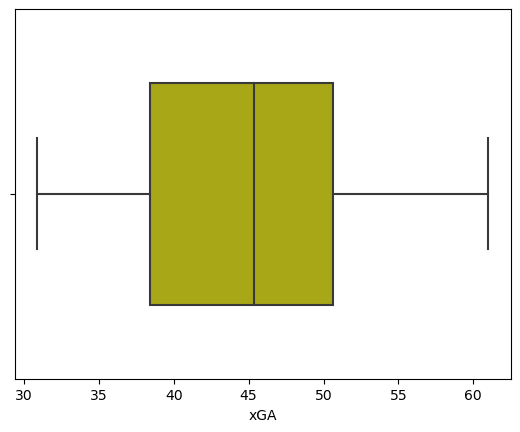

In [7]:

ax = sns.boxplot(x='xGA', data=df_spain,  color='y', fliersize=6,  orient='h', linewidth=1.5 , width=.6)
plt.show()

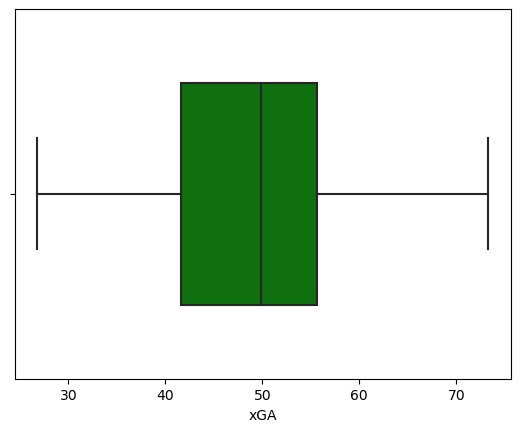

In [8]:
ax = sns.boxplot(x='xGA', data=df_others,  color='g', fliersize=6,  orient='h', linewidth=1.5 , width=.6)
plt.show()

### Prova d'hipòtesis estadística paramètrica

Comprovem que la mitjana del atribut xGA dels equips epanyols están per sobre la mitjana de la resta d'equips d'EU.

Establim les hipòtesis:
    
- *Ho: μ = 49.45*
- *Ha: μ < 49.45*

In [9]:
import scipy.stats as stats
import math

# stats.ttest_1samp correspon al t-test que calcula la mitjana d'un grup. 
# És una prova d'hipòtesis on la Ho es el valor esperat de la mitjana del subgrup de 
# la mostra 'a' que compara amb la mitjana de la totalitat de la població:

stats.ttest_1samp(a=df_spain.xGA, popmean=49.45)

Ttest_1sampResult(statistic=-2.1158105627089925, pvalue=0.04779194855146738)

L'estadístic de la prova t es -2.1158 i el valor p = 0.047 i menor de alfa = 0.05 com em establert, pertant rebutgem la Ho. Això voldrà dir que la mitjana del atribut xGA dels equips espanyols serà inferior (no igual) a la mitjana poblacional.

### Prova de normalitat: Prueba de Shapiro-Wilk

Aquesta prova determina si les dades tenen una distribuicó gaussiana (Laplace-Gauss), es a dir, és una distribució simètrica: el valor de la mitja, la mitjana i la mode coincideixen.

Interpretació de les hipòtesis:
- *Ho: té distribució gaussiana*
- *Ha: no té distribució gaussiana*

In [10]:
df_spain2 = df_spain.xGA

In [11]:
from scipy.stats import shapiro

stat, p = shapiro(df_spain2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement no té una distribució Gaussiana')
else:
    print('Probablement té una distribució Gaussiana')

stat=0.967, p=0.680
Probablement no té una distribució Gaussiana


## Exercici 2

Selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.


In [23]:
df.Squad.unique()

array(['Manchester City', 'Liverpool', 'Real Madrid', 'Bayern Munich',
       'Paris S-G', 'Milan', 'Inter', 'Napoli', 'Dortmund', 'Barcelona',
       'Chelsea', 'Juventus', 'Leverkusen', 'Monaco', 'Tottenham',
       'Marseille', 'Atlético Madrid', 'Arsenal', 'Sevilla', 'Rennes',
       'Betis', 'Lazio', 'RB Leipzig', 'Strasbourg', 'Nice',
       'Union Berlin', 'Real Sociedad', 'Lens', 'Fiorentina', 'Roma',
       'Freiburg', 'Atalanta', 'Lyon', 'Manchester Utd', 'Köln',
       'Villarreal', 'West Ham', 'Athletic Club', 'Nantes', 'Lille',
       'Hellas Verona', 'Wolves', 'Torino', 'Mainz 05', 'Sassuolo',
       'Hoffenheim', 'Leicester City', "M'Gladbach", 'Brighton', 'Brest',
       'Osasuna', 'Crystal Palace', 'Celta Vigo', 'Reims',
       'Eint Frankfurt', 'Brentford', 'Wolfsburg', 'Bochum',
       'Aston Villa', 'Valencia', 'Udinese', 'Newcastle Utd',
       'Montpellier', 'Bologna', 'Rayo Vallecano', 'Augsburg', 'Espanyol',
       'Southampton', 'Getafe', 'Elche', 'Angers', 'Em

In [34]:
df_team = pd.DataFrame()
for t in df.Squad.unique():
    df_team = df[[ 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD','Pts', 'Pts/G', 'xG', 'xGA', 'xGD']]
df_team

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD
0,Manchester City,37,28,6,3,96,24,72,90,2.43,86.099998,26.799999,59.299999
1,Liverpool,36,26,8,2,89,24,65,86,2.39,84.599998,33.099998,51.400002
2,Real Madrid,37,26,7,4,80,31,49,85,2.30,73.000000,45.799999,27.200001
3,Bayern Munich,34,24,5,5,97,37,60,77,2.26,88.099998,37.099998,51.000000
4,Paris S-G,37,25,8,4,85,36,49,83,2.24,71.599998,38.099998,33.400002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Bordeaux,37,5,13,19,48,89,-41,28,0.76,41.299999,68.500000,-27.200001
94,Venezia,37,6,8,23,34,69,-35,26,0.70,35.400002,70.500000,-35.099998
95,Watford,37,6,5,26,33,75,-42,23,0.62,37.799999,64.099998,-26.299999
96,Norwich City,37,5,7,25,23,79,-56,22,0.59,33.000000,73.300003,-40.400002


Seleccionem l'atribut gols (GF) i comparem els goals esperats (xG).

Establim les hipòtesis:

Ho: No hi ha relació entre els gols i els gols esperats (no bon ajust del model de previsió)
    
Ha: Existeix relació entre els atributs gols i gols esperats (bon ajust del model previsió)

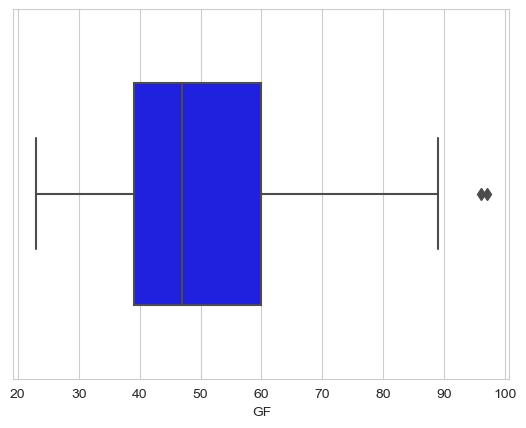

In [35]:
# Grafiquem per escollir el tipus de distribució més acertada

sns.set_style("whitegrid")
ax = sns.boxplot(x='GF', data=df_team,  color='b', fliersize=6,  orient='h', linewidth=1.5 , width=.6)
plt.show()

Utilitzem el test de correlació de Spearman per identificar si entre els atributs ténen una relació d'independència e identicament distribuides. La variable predictora i la independent són quantitatives i volem comparar-les.

No té una distribució normal.

In [37]:
# Test Spearmean

from scipy.stats import spearmanr

stat, p = spearmanr(df_team.GF, df_team.xG)
print('stat=%.3f, p=%.3f' % (stat, p))


if p > 0.05: 
  print("Aceptem la hipòtesis nula. Pertant els dos atributs són independents") 
else: 
  print("Rebutgem la hipòtesis nula. Pertant són atributs dependents")

stat=0.899, p=0.000
Rebutgem la hipòtesis nula. Pertant són atributs dependents


## Exercici 3

Selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Valorem el següents supòsits:
    *les dades es distribueixen normalment
    *els grups que es comparen ténen una vaiança similar
    *les dades són independents
    
Si les dades no umpleixen en cap d'aquestes suposicións, haurem de aplicaruna prova estadística no paramétrica.

In [48]:
df_Squad = df[['Country','Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']]


df_England = df_Squad[df_Squad.Country == 'ENG']    
df_England


,Country,Squad,MP,W,D,L,GF,GA,GD,Pts
0,ENG,Manchester City,37,28,6,3,96,24,72,90
1,ENG,Liverpool,36,26,8,2,89,24,65,86
10,ENG,Chelsea,36,20,10,6,73,31,42,70
14,ENG,Tottenham,37,21,5,11,64,40,24,68
17,ENG,Arsenal,36,21,3,12,56,45,11,66
33,ENG,Manchester Utd,37,16,10,11,57,56,1,58
36,ENG,West Ham,37,16,8,13,59,48,11,56
41,ENG,Wolves,37,15,6,16,37,40,-3,51
46,ENG,Leicester City,36,13,9,14,57,57,0,48
48,ENG,Brighton,37,11,15,11,39,43,-4,48


In [50]:
df_England.describe()

,MP,W,D,L,GF,GA,GD,Pts
count,20.000000,20.00000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000
mean,36.500000,13.95000,8.600000,13.95000,50.900000,50.900000,0.000000,50.450000
std,0.512989,6.45205,3.470174,6.15993,18.657297,15.724269,32.437795,18.348885
min,36.000000,5.00000,3.000000,2.00000,23.000000,24.000000,-56.000000,22.000000
25%,36.000000,9.75000,6.000000,11.00000,39.000000,42.250000,-20.000000,39.000000
50%,36.500000,13.00000,8.000000,14.00000,47.000000,50.000000,-2.000000,47.000000
75%,37.000000,17.00000,10.250000,17.25000,57.500000,59.500000,11.000000,60.000000
max,37.000000,28.00000,15.000000,26.00000,96.000000,79.000000,72.000000,90.000000


Volem valorar el partits disputats, els partits guanyats y el puts obtinguts per cada equip anglès.

Establim les hipòtesis:

Ho: No hi ha relació entre les dades. Són independents
    
Ha: Hi ha dependència entre les dades

In [52]:
# Prova F ens indica si si dos grups o més són similars o no en funció de la seva similitud mitjana i la puntuació F.
# Testeja si les dades són similars o no en funció de la seva similitud mitjana i la puntuació F.
# F = Variabilitat entre grups / Variabilitat dins del grup.

F, p = stats.f_oneway(df_England['MP'] , df_England['W'], df_England['Pts'])
print("Valor p: ", p)
if p < 0.05: 
    print("Rebutgem hipòtesis nul.la. Pertant les dades són independents") 
else: 
    print("Aceptem hipótesis nula. Les dades són dependents")

Valor p:  7.579360507718435e-14
Rebutgem hipòtesis nul.la. Pertant les dades són independents
